In [ ]:
from google.colab import drive
drive._mount('/content/drive')

ValueError: ignored

In [ ]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/ct_covid.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input,Dense,Reshape,Flatten,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Embedding,Activation,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical  

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras import Model
#!wget --no-check-certificate \
    #https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    #-O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

#local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')
#pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = True
  
#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed4')
#print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:

from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                
x = layers.Dense  (1, activation='sigmoid')(x)         
model = Model( pre_trained_model.input, x) 
model.compile(optimizer = Adam(lr=0.00003),  
              loss = 'binary_crossentropy', 
              metrics = ['accuracy','Precision', 'Recall'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/dataset/train"
training_datagen = ImageDataGenerator(rescale = 1./255)
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/dataset/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
  class_mode='binary',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='binary',
  batch_size=64
)


Found 558 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=100,
      verbose=1,
      )

Epoch 1/100
9/9 [==============================] - 23s 997ms/step - loss: 0.7630 - accuracy: 0.5663 - precision: 0.5576 - recall: 0.6416 - val_loss: 0.7218 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.0857
Epoch 2/100
9/9 [==============================] - 7s 727ms/step - loss: 0.6185 - accuracy: 0.6541 - precision: 0.6617 - recall: 0.6308 - val_loss: 0.6492 - val_accuracy: 0.5857 - val_precision: 0.8000 - val_recall: 0.2286
Epoch 3/100
9/9 [==============================] - 7s 735ms/step - loss: 0.5746 - accuracy: 0.7043 - precision: 0.7176 - recall: 0.6738 - val_loss: 0.5397 - val_accuracy: 0.7000 - val_precision: 0.8500 - val_recall: 0.4857
Epoch 4/100
9/9 [==============================] - 7s 712ms/step - loss: 0.5367 - accuracy: 0.7240 - precision: 0.7306 - recall: 0.7097 - val_loss: 0.5630 - val_accuracy: 0.6857 - val_precision: 0.8611 - val_recall: 0.4429
Epoch 5/100
9/9 [==============================] - 7s 717ms/step - loss: 0.4985 - accuracy: 0.7419 - precis

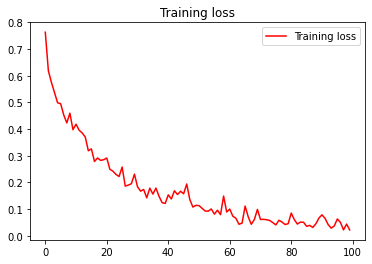

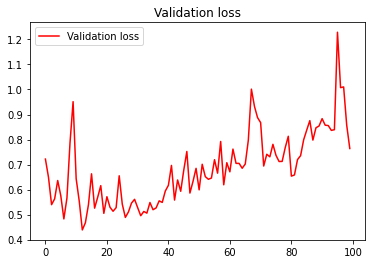

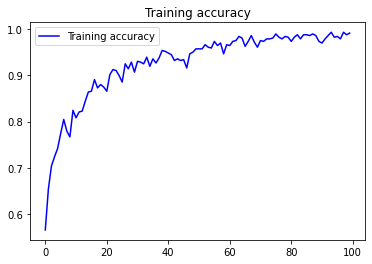

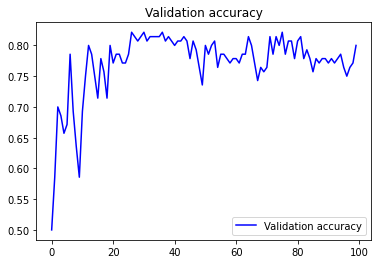

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)